In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd                # 1줄
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(10)                        # 10명 미리보기

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


1. “1등석 승객의 생존확률은 3등석보다 높을까?”
2. “여성과 남성의 생존확률 차이는 우연인가?”
3. “요금(Fare)이 비쌀수록 생존확률이 올라갈까?”

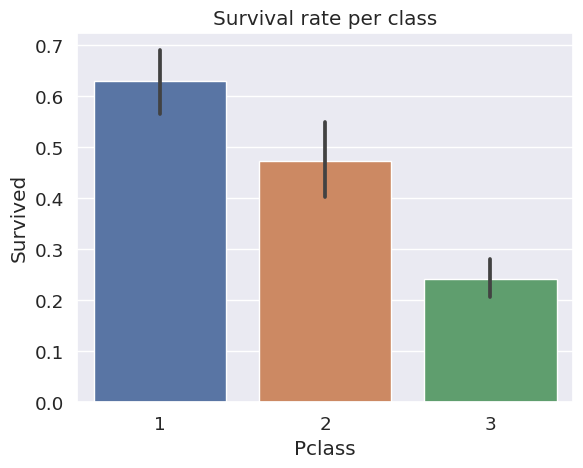

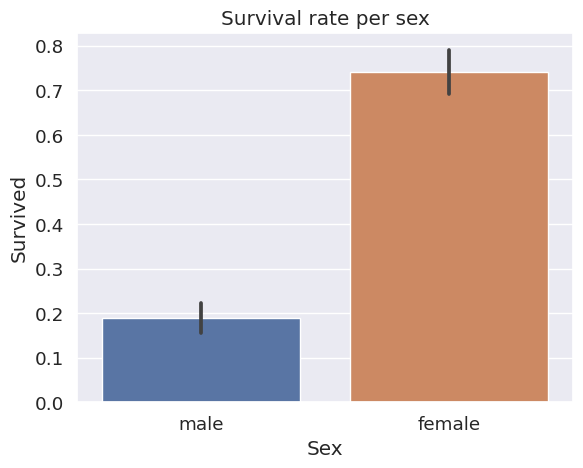

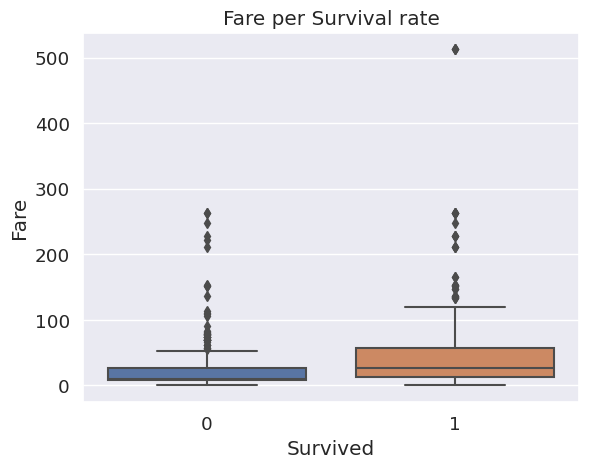

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)

# 1. 클래스별 생존률
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival rate per class')
plt.show()

# 2. 성별 생존률
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate per sex')
plt.show()

# 3. 요금 분포 (생존/사망)
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare per Survival rate')
plt.show()

In [27]:
from scipy import stats

# 1. t-test: 1등석 vs 3등석 생존확률
class1 = df[df.Pclass==1].Survived
class3 = df[df.Pclass==3].Survived
t, p = stats.ttest_ind(class1, class3)
print(f"t-test p-value: {p:.2e}")

# 2. χ²-test: 성별 vs 생존
table = pd.crosstab(df.Sex, df.Survived)
chi2, p, dof, exp = stats.chi2_contingency(table)
print(f"카이제곱: {chi2:.2e}")
print(f"p-value: {p:.2e}")
print(f"자유도: {dof:.2e}")
print(pd.DataFrame(exp, index=['남자','여자'], columns=['사망','생존']))
print(f"카이제곱 p-value: {p:.2e}")

# 3. 요금 vs 생존 상관분석
corr, p3 = stats.pointbiserialr(df['Survived'], df['Fare'])
print(f"요금 vs 생존: r = {corr:.3f}, p = {p3:.2e}")

t-test p-value: 1.48e-24
카이제곱: 2.61e+02
p-value: 1.20e-58
자유도: 1.00e+00
            사망          생존
남자  193.474747  120.525253
여자  355.525253  221.474747
카이제곱 p-value: 1.20e-58
요금 vs 생존: r = 0.257, p = 6.12e-15


## 결론
- 1등석 승객은 3등석보다 **63% vs 24%** 생존 (t-test p<0.001)  
- 여성은 남성보다 **74% vs 19%** 생존 (χ² p<0.001)  
- 요금이 높을수록 생존 확률 ↑ (상관계수 0.26)

  
Github: github.com/paredes32/titanic-stats

In [23]:
from sklearn.linear_model import LogisticRegression
X = df[['Pclass','Sex','Fare']].copy()
X['Sex'] = X['Sex'].map({'male':0,'female':1})
y = df.Survived
model = LogisticRegression().fit(X,y)
print(f"정확도: {model.score(X,y):.3f}")

정확도: 0.787
